# Preperation

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Import Libaryr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style visualisasi
sns.set_style('whitegrid')

# Dataset
file_path = '/content/drive/MyDrive/Dibimbing/Assignment Extra Class 9 - Feature Importance Analysis & Model Interpretation/bank_churn_data.csv'

# Baca dataset
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
print("Data berhasil di-load. Tampilkan 5 baris pertama:")
print(df.head())

# Lihat informasi dataset
print("\nInformasi dasar dataset:")
df.info()

Data berhasil di-load. Tampilkan 5 baris pertama:
     user_id     attrition_flag  customer_age gender  dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  education_level marital_status income_category card_category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   months_on_book  ...  months_inactive_12_mon  contacts_count_12_mon  \
0              39  ...                   

In [33]:
# sepertinya tidak ada missing value tapi kita coba cek
df.isna().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


In [34]:
# missing value
df.isnull().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


# Eksplorasi Data

## Distribusi Usia & Churn

Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?

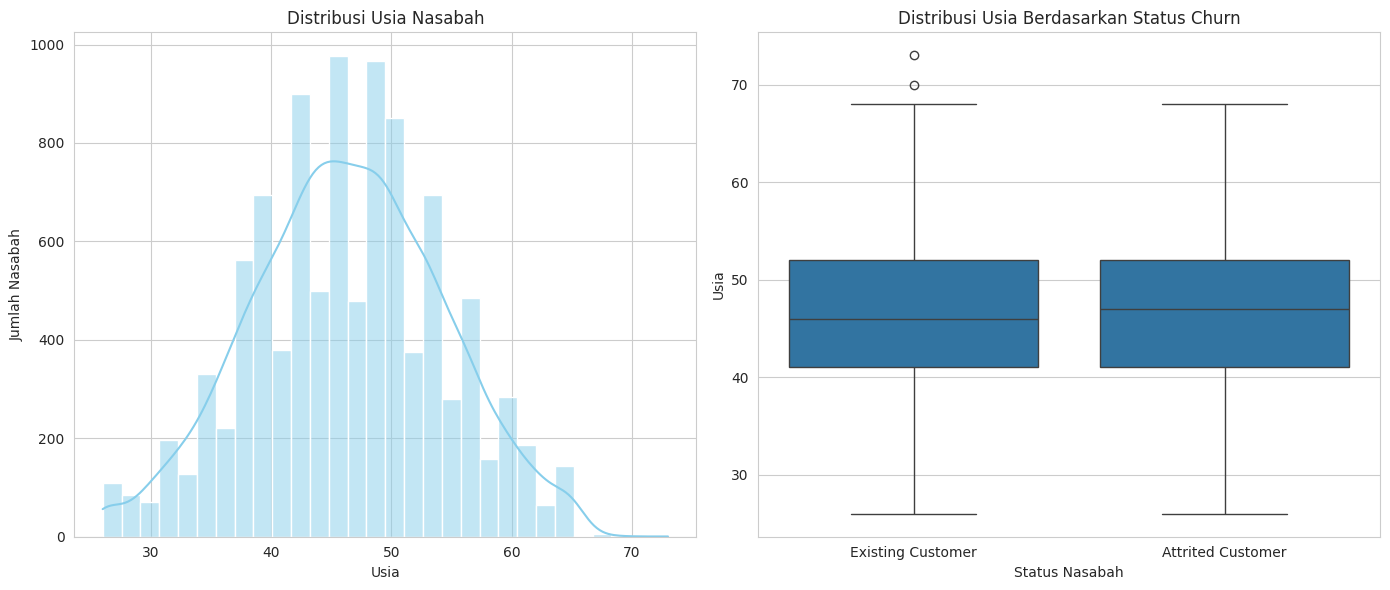

In [35]:
# Visualisasi distribusi usia
plt.figure(figsize=(14, 6))

# Histogram distribusi usia keseluruhan
plt.subplot(1, 2, 1)
sns.histplot(df['customer_age'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Usia Nasabah')
plt.xlabel('Usia')
plt.ylabel('Jumlah Nasabah')

# Boxplot usia berdasarkan status churn
plt.subplot(1, 2, 2)
sns.boxplot(x='attrition_flag', y='customer_age', data=df)
plt.title('Distribusi Usia Berdasarkan Status Churn')
plt.xlabel('Status Nasabah')
plt.ylabel('Usia')

plt.tight_layout()
plt.show()

* Distribusi usia nasabah berbentuk seperti lonceng (mendekati normal), dengan konsentrasi terbesar pada kelompok usia paruh baya (puncak di 45-50 tahun).
* Berdasarkan data ini, tidak ada kelompok usia spesifik yang menonjol memiliki kemungkinan churn terbesar. Profil usia nasabah yang churn sangat mirip dengan profil usia nasabah yang tetap setia. Median usia dan sebaran usia untuk kedua kelompok hampir identik.

## Korelasi Pendidikan, Pendapatan, dan Churn

Apakah terdapat korelasi antara tingkat pendidikan dan income category? Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?

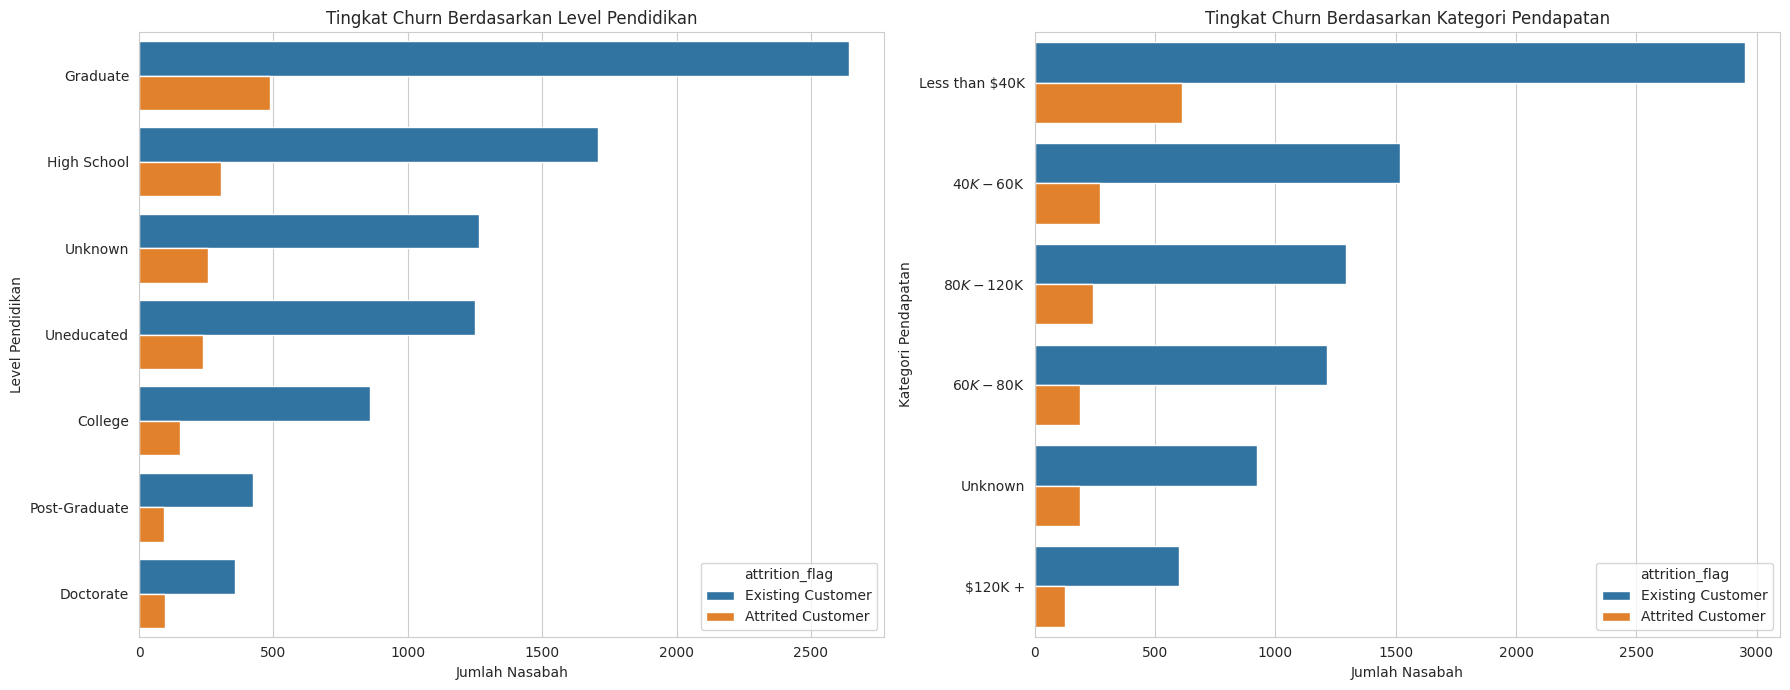

In [36]:
# Analisis Pendidikan vs Pendapatan vs Churn

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot Education vs Churn
sns.countplot(y='education_level', hue='attrition_flag', data=df, ax=axes[0], order=df['education_level'].value_counts().index)
axes[0].set_title('Tingkat Churn Berdasarkan Level Pendidikan')
axes[0].set_xlabel('Jumlah Nasabah')
axes[0].set_ylabel('Level Pendidikan')

# Plot untuk Income Category vs Churn
sns.countplot(y='income_category', hue='attrition_flag', data=df, ax=axes[1], order=df['income_category'].value_counts().index)
axes[1].set_title('Tingkat Churn Berdasarkan Kategori Pendapatan')
axes[1].set_xlabel('Jumlah Nasabah')
axes[1].set_ylabel('Kategori Pendapatan')

plt.tight_layout()
plt.show()

* Pendidikan nggak langsung berkorelasi dengan pendapatan. Lebih baik cek heatmap dari tabel silang untuk lihat apakah nasabah berpenghasilan rendah (< $40K) cenderung punya tingkat pendidikan tertentu.
* Pendidikan nggak terlalu berpengaruh ke churn. Tapi pendapatan jelas berpengaruh — makin rendah income, makin tinggi peluang churn. Sebaliknya, nasabah berpenghasilan lebih tinggi lebih loyal.

## Perbedaan Churn Berdasarkan Gender

Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?

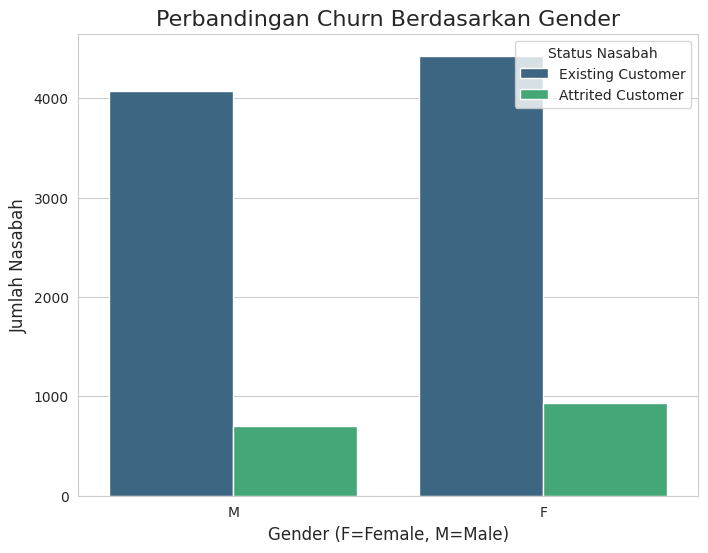

In [37]:
plt.figure(figsize=(8, 6))

# Membuat countplot untuk melihat distribusi churn per gender
sns.countplot(x='gender', hue='attrition_flag', data=df, palette='viridis')

plt.title('Perbandingan Churn Berdasarkan Gender', fontsize=16)
plt.xlabel('Gender (F=Female, M=Male)', fontsize=12)
plt.ylabel('Jumlah Nasabah', fontsize=12)
plt.legend(title='Status Nasabah')
plt.show()

Ya, terdapat perbedaan. Meskipun tidak dramatis, data menunjukkan bahwa nasabah wanita memiliki tingkat churn (sekitar 17%) yang sedikit lebih tinggi dibandingkan nasabah pria (sekitar 14.7%).

## Lama Menjadi Nasabah vs Churn

Apakah semakin lama customer menjadi nasabah (months_on_book) maka semakin kecil kemungkinan nasabah tersebut untuk churn?

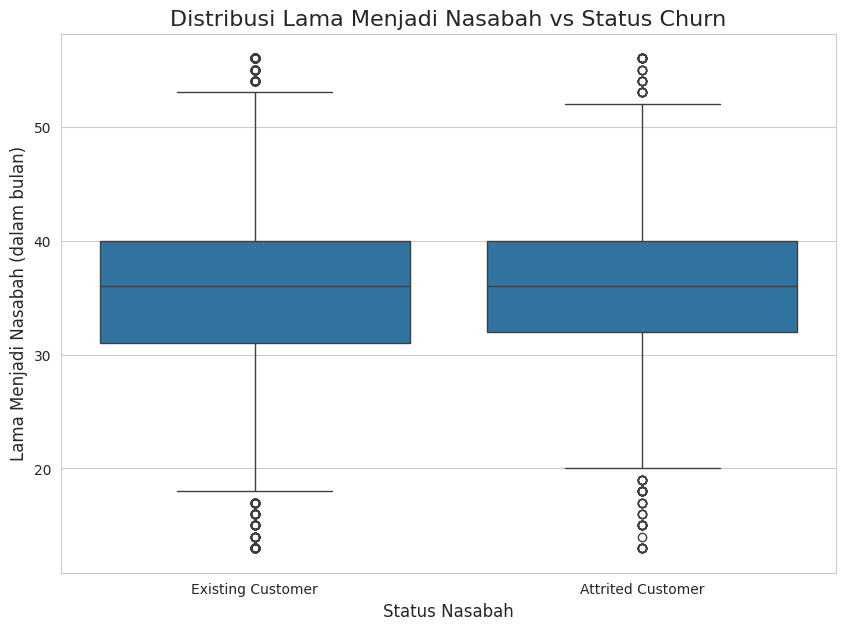

In [38]:
plt.figure(figsize=(10, 7))

# Membuat boxplot untuk membandingkan distribusi 'months_on_book'
sns.boxplot(x='attrition_flag', y='months_on_book', data=df)

plt.title('Distribusi Lama Menjadi Nasabah vs Status Churn', fontsize=16)
plt.xlabel('Status Nasabah', fontsize=12)
plt.ylabel('Lama Menjadi Nasabah (dalam bulan)', fontsize=12)
plt.show()

Berdasarkan bukti visual dari boxplot ini, jawabannya adalah TIDAK. Data tidak mendukung hipotesis tersebut. Profil "lama menjadi nasabah" untuk kelompok yang churn dan yang tidak churn hampir sama persis. Nasabah yang telah bergabung selama 18 bulan, 36 bulan, atau 50 bulan memiliki profil churn yang serupa dari segi durasi.

## Interaksi Terakhir vs Churn

Apakah semakin sering customer berinteraksi (contacts_count_12_mon) dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?

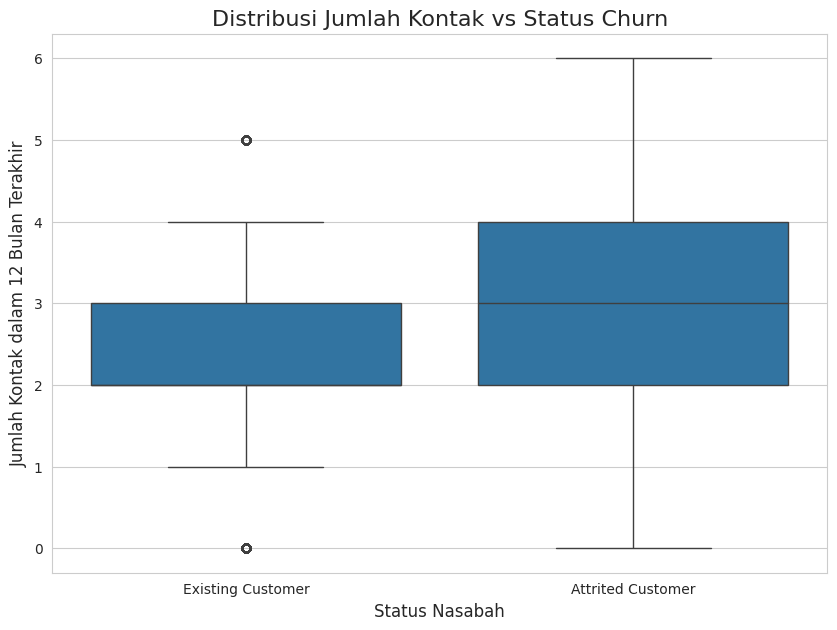

In [39]:
plt.figure(figsize=(10, 7))

# Membuat boxplot untuk membandingkan distribusi 'contacts_count_12_mon'
sns.boxplot(x='attrition_flag', y='contacts_count_12_mon', data=df)

plt.title('Distribusi Jumlah Kontak vs Status Churn', fontsize=16)
plt.xlabel('Status Nasabah', fontsize=12)
plt.ylabel('Jumlah Kontak dalam 12 Bulan Terakhir', fontsize=12)
plt.show()

Data menunjukkan tren yang jelas bahwa semakin sering nasabah berinteraksi dengan bank, semakin besar kemungkinan mereka untuk churn.

# Preprocessing Data dan Feature Engineering

In [40]:
from sklearn.model_selection import train_test_split

# Salit dataframe agar tidak mengubah data mentahnya
df_processed = df.copy()

# Membersihkan kolom
cols_to_drop = ['user_id']
df_processed = df_processed.drop(columns=cols_to_drop)
print("Kolom 'user_id' sudah dibuang.")

Kolom 'user_id' sudah dibuang.


In [41]:
# Encoding Variabel Target
df_processed['attrition_flag'] = df_processed['attrition_flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
print("Variabel target 'attrition_flag' sudah di-encode menjadi 0 dan 1.")

Variabel target 'attrition_flag' sudah di-encode menjadi 0 dan 1.


In [42]:
# Encoding Variabel Fitur
# Ordinal Encoding untuk 'education_level' dan 'income_category'
edu_map = {
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
}
df_processed['education_level'] = df_processed['education_level'].map(edu_map)

inc_map = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}
df_processed['income_category'] = df_processed['income_category'].map(inc_map)

# One-Hot Encoding untuk fitur nominal
df_processed = pd.get_dummies(df_processed, columns=['gender', 'marital_status', 'card_category'], drop_first=True)
print("Variabel kategorikal sudah di-encode menjadi numerik.")
print("\nContoh data setelah di-encode:")
display(df_processed.head())

Variabel kategorikal sudah di-encode menjadi numerik.

Contoh data setelah di-encode:


,attrition_flag,customer_age,dependent_count,education_level,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,...,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_M,marital_status_Married,marital_status_Single,marital_status_Unknown,card_category_Gold,card_category_Platinum,card_category_Silver
0,0,45,3,2,3,39,5,1,3,12691.0,...,42,1.625,0.061,True,True,False,False,False,False,False
1,0,49,5,4,1,44,6,1,2,8256.0,...,33,3.714,0.105,False,False,True,False,False,False,False
2,0,51,3,4,4,36,4,1,0,3418.0,...,20,2.333,0.000,True,True,False,False,False,False,False
3,0,40,4,2,1,34,3,4,1,3313.0,...,20,2.333,0.760,False,False,False,True,False,False,False
4,0,40,3,1,3,21,5,1,0,4716.0,...,28,2.500,0.000,True,True,False,False,False,False,False


In [43]:
# Memisahkan Data
X = df_processed.drop('attrition_flag', axis=1)
y = df_processed['attrition_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData sudah berhasil dipisahkan menjadi data latih dan data uji.")
print(f"Ukuran Data Train (X_train): {X_train.shape}")
print(f"Ukuran Data Test (X_test): {X_test.shape}")


Data sudah berhasil dipisahkan menjadi data latih dan data uji.
Ukuran Data Latih (X_train): (8101, 23)
Ukuran Data Uji (X_test): (2026, 23)


# Pemodelan

In [44]:
# Import library untuk scaling dan model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Scaling Fitur
scaler = StandardScaler()

# transform data train
X_train_scaled = scaler.fit_transform(X_train)

# Transform data test
X_test_scaled = scaler.transform(X_test)

print("Scaling fitur berhasil dilakukan.")
print(f"Bentuk data train setelah di-scale: {X_train_scaled.shape}")

Scaling fitur berhasil dilakukan.
Bentuk data train setelah di-scale: (8101, 23)


In [45]:
# Train Model Regresi Logistik
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train model menggunakan Data Train yang sudah di scale
log_reg.fit(X_train_scaled, y_train)

print("\nModel Regresi logistik berhasil dilatih!")


\Model Regresi logistik berhasil dilatih!


In [46]:
# Membuat Prediksi
y_pred = log_reg.predict(X_test_scaled)

print("\nPrediksi pada data uji berhasil dibuat.")
print("Contoh 10 hasil prediksi pertama:")
print(y_pred[:10])
print("\nBandingkan dengan 10 data aktual pertama:")
print(y_test.to_numpy()[:10])


Langkah 4: Prediksi pada data uji berhasil dibuat.
Contoh 10 hasil prediksi pertama:
[0 0 0 0 0 0 0 0 0 0]

Bandingkan dengan 10 data aktual pertama:
[0 0 0 0 0 0 0 0 0 0]


In [47]:
# Menghitung jumlah unik dari seluruh hasil prediksi di y_pred
prediction_counts = pd.Series(y_pred).value_counts()

print("Ringkasan dari seluruh hasil prediksi:")
print(prediction_counts)

Ringkasan dari seluruh hasil prediksi:
0    1805
1     221
Name: count, dtype: int64


# Evaluasi Model

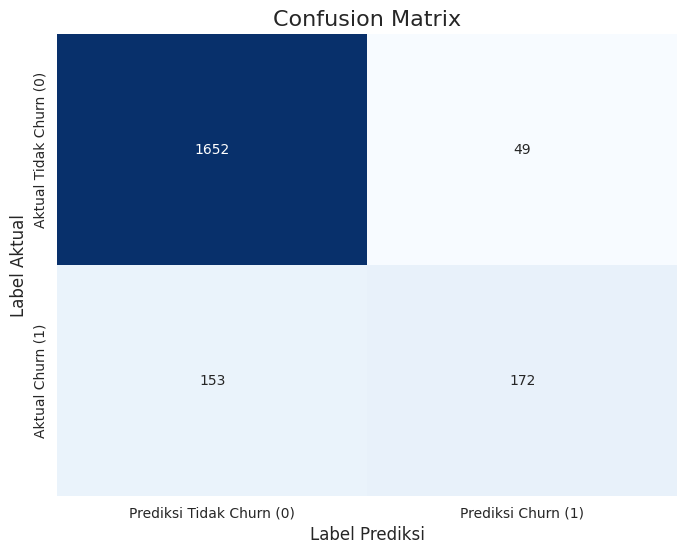

In [48]:
# Import library untuk evaluasi
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Prediksi Tidak Churn (0)', 'Prediksi Churn (1)'],
            yticklabels=['Aktual Tidak Churn (0)', 'Aktual Churn (1)'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Label Aktual', fontsize=12)
plt.xlabel('Label Prediksi', fontsize=12)
plt.show()

* True Positive (TP) = 172: Model kita berhasil menemukan 172 nasabah yang benar-benar akan churn. Ini adalah kesuksesan utama model kita.
* True Negative (TN) = 1652: Model kita dengan tepat mengidentifikasi 1652 nasabah yang loyal dan tidak akan churn. Ini menunjukkan model sangat baik dalam mengenali mayoritas nasabah.
* False Negative (FN) = 153: Ini adalah kelemahan utama. Model kita melewatkan 153 nasabah yang ternyata churn. Mereka diprediksi aman, padahal tidak. Ini adalah "risiko" terbesar bagi bisnis.
* False Positive (FP) = 49: Model kita salah mengira 49 nasabah loyal akan churn. Ini adalah "biaya" intervensi yang tidak perlu, tapi jumlahnya relatif kecil.

In [49]:
# Classification Report
print("\n" + "="*50)
print("Classification Report")
print("="*50)
print(classification_report(y_test, y_pred))


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.78      0.53      0.63       325

    accuracy                           0.90      2026
   macro avg       0.85      0.75      0.79      2026
weighted avg       0.89      0.90      0.89      2026



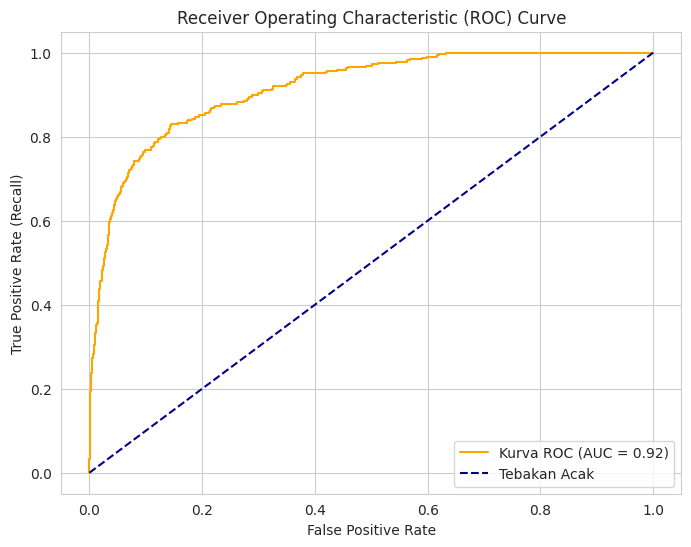


Nilai Area Under Curve (AUC): 0.9154


In [50]:
# ROC Curve dan AUC Score
# butuh probabilitas prediksi untuk kelas positif (churn)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Hitung FPR, TPR, dan thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung AUC score
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'Kurva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Tebakan Acak')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"\nNilai Area Under Curve (AUC): {auc:.4f}")

# Analisis Interpretabilitas & Rekomendasi

/tmp/ipython-input-51-613532891.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Koefisien', y='Fitur', data=feature_importance, palette='RdBu_r')


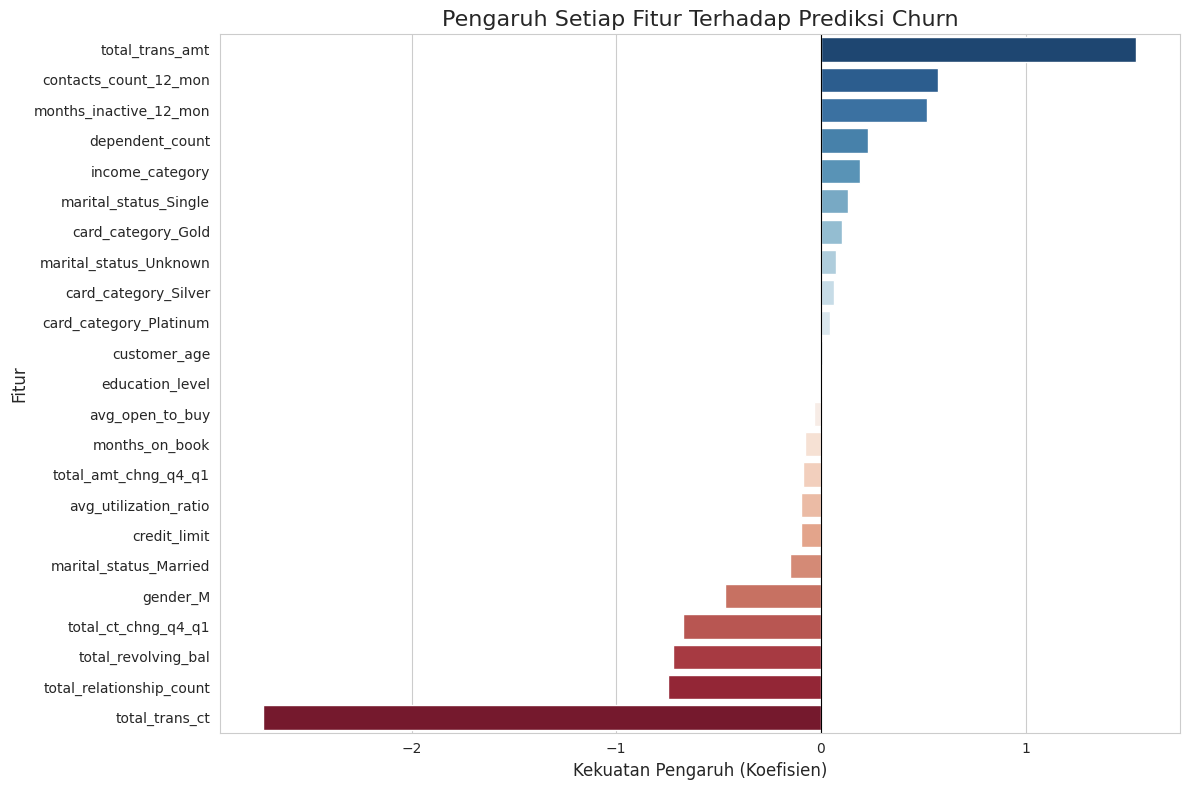

In [51]:
# Membuat DataFrame untuk menyimpan nama fitur dan koefisiennya
# log_reg.coef_[0] berisi array dari semua nilai koefisien
feature_importance = pd.DataFrame({'Fitur': X_train.columns, 'Koefisien': log_reg.coef_[0]})

# Mengurutkan DataFrame berdasarkan nilai koefisien untuk visualisasi yang lebih baik
feature_importance = feature_importance.sort_values(by='Koefisien', ascending=False)

# Membuat visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(x='Koefisien', y='Fitur', data=feature_importance, palette='RdBu_r')
plt.title('Pengaruh Setiap Fitur Terhadap Prediksi Churn', fontsize=16)
plt.xlabel('Kekuatan Pengaruh (Koefisien)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.axvline(x=0, color='black', linewidth=0.8) # Garis tengah di nol
plt.tight_layout()
plt.show()

# Interpretasi Final dan Rekomendasi Bisnis

**Penjelasan Grafik:**
- **Batang Biru (ke kanan)** → Faktor pendorong churn (semakin panjang, makin berisiko).
- **Batang Merah (ke kiri)** → Faktor pendorong loyalitas (makin panjang, makin setia).

---

## Faktor Utama Pendorong Churn
### 1. `total_trans_amt` (Total Nilai Transaksi)
- **Insight:** Semakin tinggi total transaksi 12 bulan terakhir, makin besar kemungkinan churn. Bisa jadi nasabah “bersiap pergi” (melunasi, tarik dana, dll.).
- **Saran:** Cek perjalanan transaksi mereka, cari pola "transaksi perpisahan". Buat strategi retensi khusus.

### 2. `contacts_count_12_mon` (Jumlah Kontak ke Bank)
- **Insight:** Banyak kontak → sinyal frustrasi dan potensi churn.
- **Saran:** Buat sistem early warning. Jika >2 kali kontak/bulan, langsung eskalasikan ke tim retention.

### 3. `months_inactive_12_mon` (Bulan Tidak Aktif)
- **Insight:** Makin lama nggak aktif, makin besar peluang mereka kabur.
- **Saran:** Bikin kampanye "re-engagement". Kirim email/notifikasi spesial kalau nasabah sudah 2 bulan nggak aktif.

---

## Faktor Utama Pendorong Loyalitas
### 1. `total_trans_ct` (Frekuensi Transaksi)
- **Insight:** Nasabah sering bertransaksi lebih setia.
- **Saran:** Program loyalitas berbasis jumlah transaksi. Kasih reward tiap 10, 20, 30 transaksi per bulan.

### 2. `total_relationship_count` (Jumlah Produk yang Dimiliki)
- **Insight:** Semakin banyak produk yang dipegang, makin loyal.
- **Saran:** Push cross-selling. Tawarkan produk baru ke nasabah setia (misal kartu kredit, KTA spesial).

### 3. `total_revolving_bal` (Saldo Berputar di Kartu Kredit)
- **Insight:** Pengguna kartu kredit aktif cenderung lebih loyal.
- **Saran:** Edukasi soal fasilitas revolving balance. Tawarkan program cicilan tetap dengan bunga ringan untuk transaksi besar.

---

## Kesimpulan dan Strategi Utama untuk Retensi Nasabah

Berdasarkan model prediktif yang sudah kita buat, terlihat bahwa:
- Nasabah berisiko churn biasanya lebih sering menghubungi bank, mulai tidak aktif, dan punya transaksi yang anomali (bisa terlalu besar nilainya).  
- Sebaliknya, nasabah loyal justru lebih sering bertransaksi dalam jumlah wajar, punya banyak produk di bank, dan aktif menggunakan limit kreditnya.

---

### Strategi untuk Meningkatkan Retensi

1. **Proaktif** Implementasikan sistem *early warning* untuk langsung mendeteksi nasabah yang terlalu sering kontak ke CS atau sudah lama nggak aktif.

2. **Engagement** Buat program loyalitas yang fokus ke frekuensi transaksi (bukan hanya soal nominalnya), agar mereka makin betah bertransaksi rutin.

3. **Integrasi** Dorong *cross-selling* supaya nasabah punya banyak produk di bank kita, biar makin “lengket” dan susah berpaling.
